<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [6]:
file_path = 'DMV_Written_Tests.csv'
data = pd.read_csv(file_path)

In [7]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

In [8]:
admitted = data[data['Results'] == 1]
not_admitted = data[data['Results'] == 0]

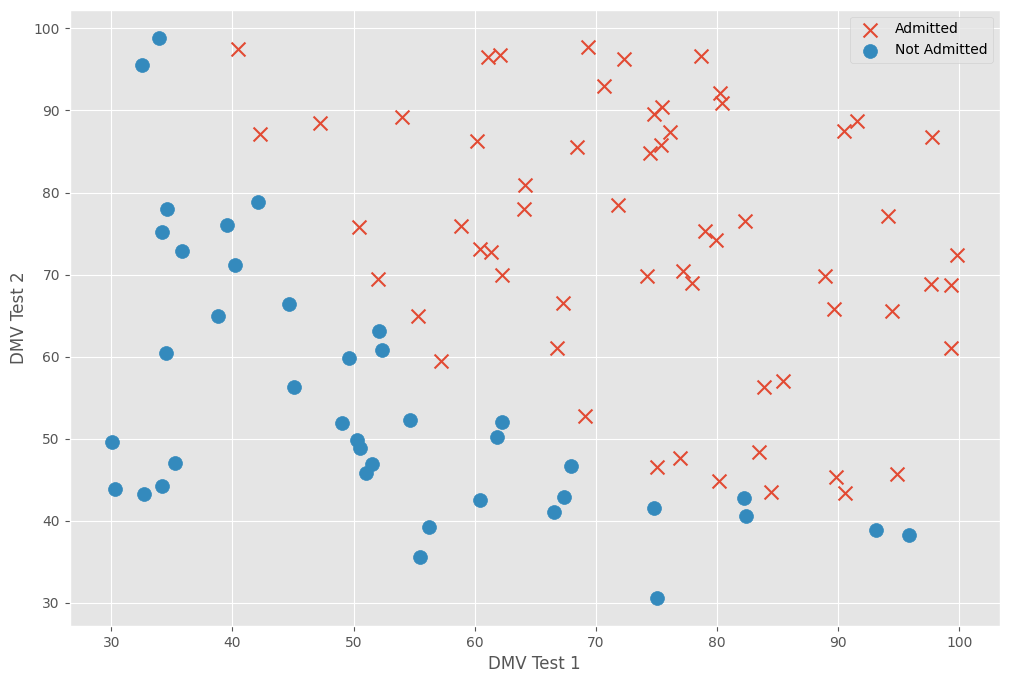

In [9]:
plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=100, marker='x', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=100, marker='o', label='Not Admitted')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [11]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    y = np.array(y)
    # Corrected cost calculation with negative sign outside and np.sum
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost, gradient(theta, X, y) # Return both cost and gradient

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    y = np.array(y)
    grad = (1/m)*X.T @ (h - y)
    return grad

### Task 6: Cost and Gradient at Initialization
---

In [12]:
X = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

X = np.insert(X, 0, 1, axis=1)

initial_theta = np.zeros(X.shape[1])

initial_cost, initial_gradient = cost_function(initial_theta, X, y)

print("Initial Cost:", initial_cost)
print("Initial Gradient:", initial_gradient)

Initial Cost: 0.6931471805599453
Initial Gradient: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [13]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []

    for i in range(num_iterations):
        cost, grad = cost_function(theta, X, y)
        theta = theta - alpha * grad
        J_history.append(cost)

    return theta, J_history

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Optimized Theta: [-0.8475667   0.15447667 -0.31886675]


/tmp/ipython-input-1459599987.py:6: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
/tmp/ipython-input-1459599987.py:6: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


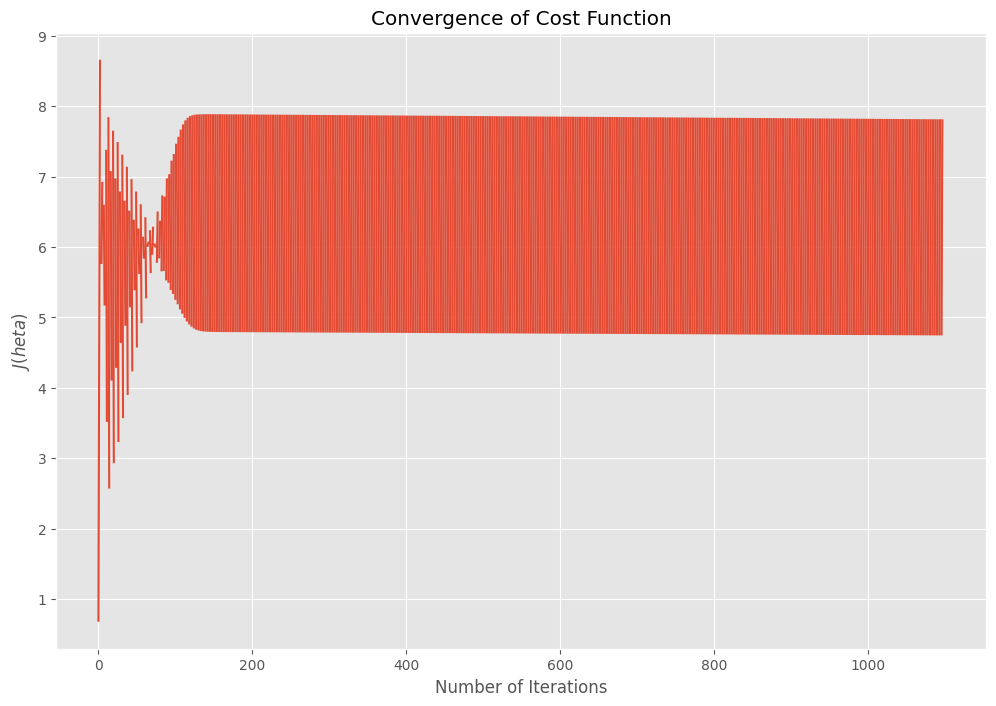

In [14]:
alpha = 0.01
num_iterations = 1100
initial_theta = np.zeros(X.shape[1])
theta, J_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)

print("Optimized Theta:", theta)

plt.plot(range(len(J_history)), J_history)
plt.xlabel("Number of Iterations")
plt.ylabel("$J(\theta)$")
plt.title("Convergence of Cost Function")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

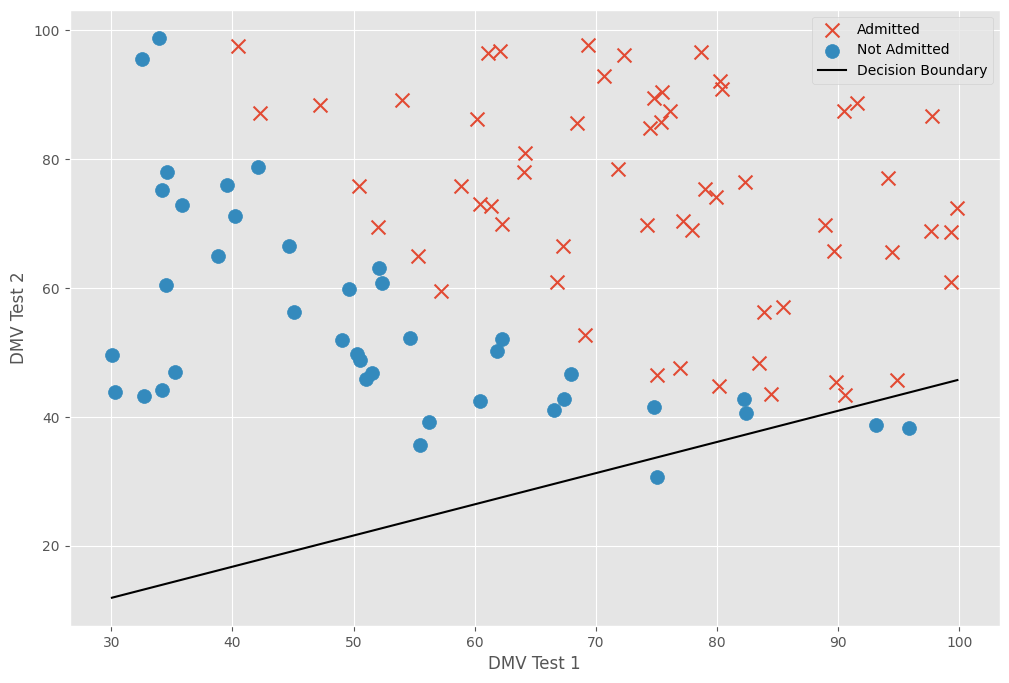

In [15]:
plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
plot_y = (-theta[0] - theta[1] * plot_x) / theta[2]

plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=100, marker='x', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=100, marker='o', label='Not Admitted')
plt.plot(plot_x, plot_y, c='black', label='Decision Boundary')
plt.xlabel('DMV Test 1')
plt.ylabel('DMV Test 2')
plt.legend()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [21]:
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)

predictions = predict(X, theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 37.00%
